# Adams–Bashforth 2-Step Method (AB2)

The Adams–Bashforth family is a set of *explicit multistep methods*.  
Unlike Euler, Heun, or RK4 (which are *single-step methods*), Adams–Bashforth uses multiple past values to predict the next point.

---

## General Idea
We want to solve:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

Using information from two previous steps, the AB2 scheme is:

$$
y_{n+1} = y_n + \frac{\Delta t}{2} \left( 3 f(t_n, y_n) - f(t_{n-1}, y_{n-1}) \right)
$$

- It is second-order accurate.  
- Requires an initial step (usually from Euler, Heun, or RK4) to start the method, since it needs two past values.

---

## Example: Exponential Decay
We solve:

$$
\frac{dy}{dt} = -\lambda y, \quad y(0) = 1
$$

with exact solution:

$$
y(t) = e^{-\lambda t}
$$

We will compare AB2 with the exact solution.

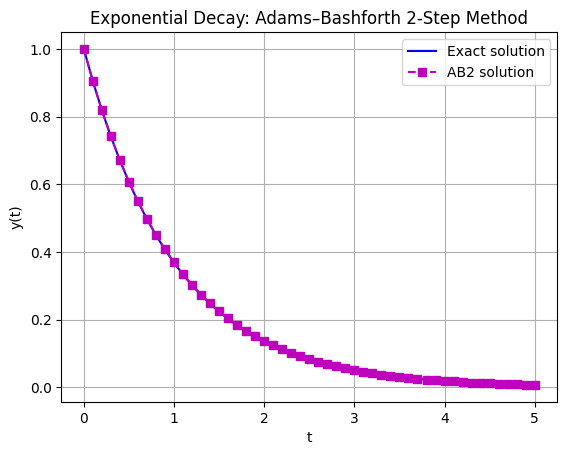

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
lam = 1.0
y0 = 1.0
dt = 0.1
T = 5.0
N = int(T/dt)

# Arrays
t = np.linspace(0, T, N+1)
y = np.zeros(N+1)
y[0] = y0

# First step using RK4 (to generate y[1])
k1 = -lam * y[0]
k2 = -lam * (y[0] + 0.5*dt*k1)
k3 = -lam * (y[0] + 0.5*dt*k2)
k4 = -lam * (y[0] + dt*k3)
y[1] = y[0] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

# AB2 method
for n in range(1, N):
    f_n   = -lam * y[n]
    f_nm1 = -lam * y[n-1]
    y[n+1] = y[n] + (dt/2.0) * (3*f_n - f_nm1)

# Exact solution
y_exact = np.exp(-lam * t)

# Plot
plt.plot(t, y_exact, 'b-', label="Exact solution")
plt.plot(t, y, 'ms--', label="AB2 solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Exponential Decay: Adams–Bashforth 2-Step Method")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- The Adams–Bashforth 2-step method (AB2) is a multistep scheme, unlike RK4.  
- Accuracy is second order, so it’s generally less accurate than RK4 for the same step size.  
- Advantage: once started, AB2 requires only one function evaluation per step (faster than RK4).  
- Disadvantage: requires a starting method (we used RK4 for the first step).  